Task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [1]:
## Import the required libaries what we want
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Data

**TASK 1: Download the dataset using Keras.**

In [2]:
## Load the data using keras
(X_train, y_train) , (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

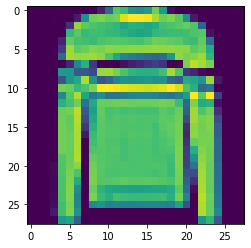

In [4]:
## plot the graph of x_train
plt.imshow(X_train[5])
plt.show()



## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [5]:
## To normalize the X_train data with maximum value 255
X_train = X_train / 255

In [6]:
## To nomalize the x_val data with maximum value 255
X_test = X_test / 255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [7]:
## Know the shape of the X_train and X_test
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [8]:
## Reshape the X_train
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [9]:
## Reshape the X1_test
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [10]:
y_train_one_hot = to_categorical(y_train,10)
y_test_one_hot =to_categorical(y_test,10)

In [11]:
y_test_one_hot.shape

(10000, 10)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [16]:
model1 = keras.Sequential([
    
    layers.Conv2D(32, (4,4), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [17]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

**Compile the model**

In [19]:
model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [21]:
model1.fit(X_train, y_train_one_hot,batch_size=64, epochs=5, validation_data=(X_test, y_test_one_hot))

Epoch 1/5
938/938 [==============================] - 38s 40ms/step - loss: 0.2437 - accuracy: 0.9124 - val_loss: 0.2719 - val_accuracy: 0.9006
Epoch 2/5
938/938 [==============================] - 38s 40ms/step - loss: 0.2149 - accuracy: 0.9196 - val_loss: 0.2719 - val_accuracy: 0.9035
Epoch 3/5
938/938 [==============================] - 39s 42ms/step - loss: 0.1906 - accuracy: 0.9296 - val_loss: 0.2595 - val_accuracy: 0.9085
Epoch 4/5
938/938 [==============================] - 38s 40ms/step - loss: 0.1721 - accuracy: 0.9363 - val_loss: 0.2821 - val_accuracy: 0.9014
Epoch 5/5
938/938 [==============================] - 40s 43ms/step - loss: 0.1532 - accuracy: 0.9446 - val_loss: 0.2930 - val_accuracy: 0.9008


### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [22]:
y_pred = model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [23]:
## Get the prodictions
print(y_pred)

[[6.4642278e-05 7.9621504e-06 1.9673085e-05 ... 4.5570944e-02
  1.7209689e-04 9.4856393e-01]
 [6.9907321e-05 7.3862649e-10 9.9896407e-01 ... 1.4521232e-08
  1.5792209e-07 8.4464652e-08]
 [5.3152843e-07 9.9999386e-01 3.1764746e-09 ... 2.0424660e-09
  1.6932065e-08 7.8766454e-10]
 ...
 [1.3126254e-02 6.3891066e-06 5.0041806e-03 ... 1.1936155e-04
  9.4386035e-01 1.1868668e-05]
 [2.7095468e-06 9.9795377e-01 3.4210632e-07 ... 3.7845639e-06
  3.7000373e-06 5.3331019e-06]
 [3.6527643e-03 3.1306606e-04 6.1357445e-03 ... 2.5492224e-01
  1.6526276e-02 5.4572364e-03]]


In [24]:
## Import the required libraries for get the score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [27]:
y_pred_1=np.argmax(y_pred, axis = 1)

In [28]:
y_test_class = np.argmax(y_test_one_hot, axis=1)

In [29]:
y_pred

array([[6.4642278e-05, 7.9621504e-06, 1.9673085e-05, ..., 4.5570944e-02,
        1.7209689e-04, 9.4856393e-01],
       [6.9907321e-05, 7.3862649e-10, 9.9896407e-01, ..., 1.4521232e-08,
        1.5792209e-07, 8.4464652e-08],
       [5.3152843e-07, 9.9999386e-01, 3.1764746e-09, ..., 2.0424660e-09,
        1.6932065e-08, 7.8766454e-10],
       ...,
       [1.3126254e-02, 6.3891066e-06, 5.0041806e-03, ..., 1.1936155e-04,
        9.4386035e-01, 1.1868668e-05],
       [2.7095468e-06, 9.9795377e-01, 3.4210632e-07, ..., 3.7845639e-06,
        3.7000373e-06, 5.3331019e-06],
       [3.6527643e-03, 3.1306606e-04, 6.1357445e-03, ..., 2.5492224e-01,
        1.6526276e-02, 5.4572364e-03]], dtype=float32)

In [30]:
## Accuracy
accuracy = accuracy_score(y_test_class, y_pred_1)
print('Accuracy is :',accuracy)

Accuracy is : 0.8794


In [31]:
##  Precision
precision = precision_score(y_test_class, y_pred_1,average='weighted')
print('Precision is :',precision)

Precision is : 0.8830260829666713


In [32]:
## Recall
recall = recall_score(y_test_class, y_pred_1,average='weighted')
print('Recall is :',recall)

Recall is : 0.8794


In [33]:
## F1 Score
f1 = f1_score(y_test_class, y_pred_1,average='weighted')
print('F1 Score is :',f1)

F1 Score is : 0.8805369701476826


**Apply the Transfer Learning**

In [34]:
### Reshape the data
X_train = X_train.reshape((X_train.shape[0],28,28))
X_test = X_test.reshape((X_test.shape[0],28,28))

## Change the type to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

## Convert data to three channels
X_train = np.stack((X_train,)*3,axis=-1)
X_test = np.stack((X_test,)*3,axis=-1)

In [35]:
X_train.shape,X_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [36]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50  import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [39]:
model2=Sequential()

# add the pretrained model
model2.add(ResNet50(include_top=False,pooling='avg',weights='imagenet'))

#add fully connected layers with out put
model2.add(Dense(128, activation='relu')),
model2.add(Dense(10, activation='softmax'))

#set resnet layers not trainable
model2.layers[0].trainable=False


In [40]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 23,851,274
Trainable params: 263,562
Non-trainable params: 23,587,712
_________________________________________________________________


**Compile model**

In [41]:
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [42]:
model2.fit(X_train, y_train_one_hot, batch_size=64,epochs=5, validation_data=(X_test, y_test_one_hot))

Epoch 1/5
938/938 [==============================] - 311s 326ms/step - loss: 0.9610 - accuracy: 0.6484 - val_loss: 0.7714 - val_accuracy: 0.7108
Epoch 2/5
938/938 [==============================] - 278s 296ms/step - loss: 0.6917 - accuracy: 0.7389 - val_loss: 0.7636 - val_accuracy: 0.6946
Epoch 3/5
938/938 [==============================] - 279s 298ms/step - loss: 0.6402 - accuracy: 0.7552 - val_loss: 0.6179 - val_accuracy: 0.7741
Epoch 4/5
938/938 [==============================] - 322s 343ms/step - loss: 0.6104 - accuracy: 0.7684 - val_loss: 0.6772 - val_accuracy: 0.7426
Epoch 5/5
938/938 [==============================] - 282s 300ms/step - loss: 0.5947 - accuracy: 0.7726 - val_loss: 0.7141 - val_accuracy: 0.7262


In [43]:
## Get the predictions
y_pred = model2.predict(X_test)
print(y_pred)

313/313 [==============================] - 59s 183ms/step
[[1.89419425e-05 8.32778735e-09 2.10622547e-05 ... 1.27666863e-02
  1.32592693e-02 4.08995032e-01]
 [7.44310915e-02 1.11113714e-07 8.80309582e-01 ... 1.91844683e-11
  4.02835989e-03 5.59940649e-10]
 [3.98164993e-05 9.97314453e-01 5.79886037e-05 ... 2.28379034e-11
  7.97003850e-08 3.99944869e-11]
 ...
 [6.42832543e-04 2.10006488e-06 7.79417926e-04 ... 5.56063862e-09
  9.91034150e-01 2.28406947e-07]
 [1.04242508e-05 9.94958103e-01 2.16852141e-06 ... 5.94345129e-10
  2.17306862e-07 1.34907040e-07]
 [3.25174560e-03 3.37383797e-04 7.25704769e-04 ... 9.73298587e-03
  2.20308267e-02 5.22258524e-05]]


In [44]:
## Import the metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [45]:
## Accuracy
accuracy = accuracy_score(y_test_class, y_pred_1)
print('Accuracy is :',accuracy)

Accuracy is : 0.8794


In [46]:
## Recall
recall = recall_score(y_test_class, y_pred_1,average='weighted')
print('Recall is :',recall)

Recall is : 0.8794


In [47]:
## F1 Score
f1 = f1_score(y_test_class, y_pred_1,average='weighted')
print('F1 Score is :',f1)

F1 Score is : 0.8805369701476826
